# Neural network model for classifying handwritten digits

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

from tensorflow.keras import models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Load dataset

In [2]:
def load_dataset():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # Split train data into train and validation data
    val_images = test_images[:5000]
    val_labels = test_labels[:5000]
    test_images = test_images[5000:]
    test_labels = test_labels[5000:]

    return (train_images, train_labels), (val_images, val_labels), (test_images, test_labels)


In [3]:
(train_images, train_labels), (val_images, val_labels), (test_images, test_labels) = load_dataset()

## Explore dataset

In [4]:
print("Training images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Testing images shape:", test_images.shape)

Training images shape: (60000, 28, 28)
Validation images shape: (5000, 28, 28)
Testing images shape: (5000, 28, 28)


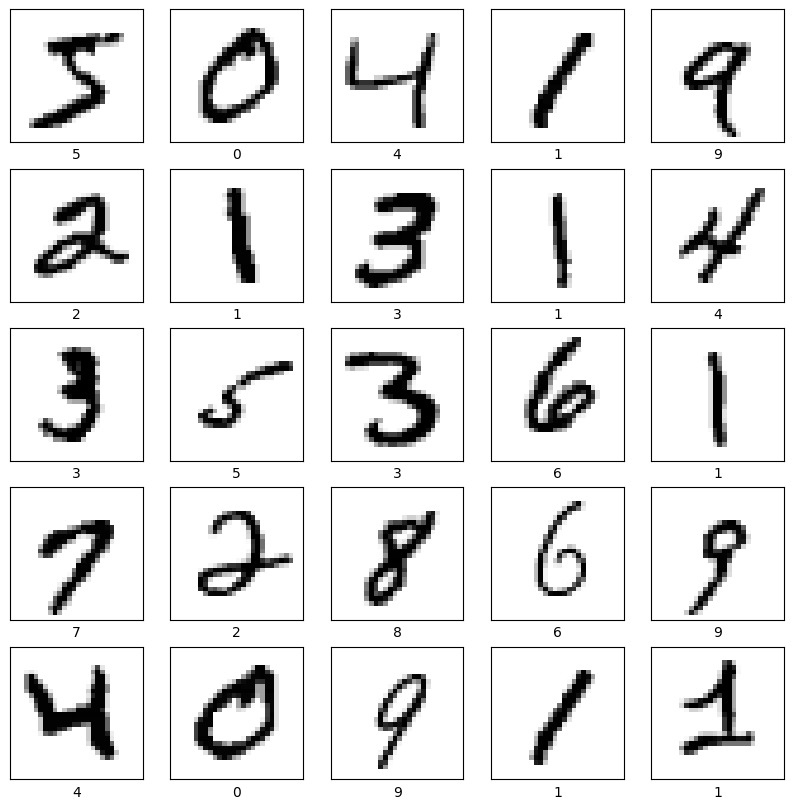

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Data pre-processing

As we can see, the vaules of the pixels (for example in row 21 of the first image in the train dataset) range from 0 to 255. Let's scale these values ​​in a range of 0 to 1.

In [6]:
train_images[0][21]

array([  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
       253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [7]:
def normalize_images(train_images, val_images, test_images):
    train_images = train_images / 255.0
    val_images = val_images / 255.0
    test_images = test_images / 255.0

    return train_images, val_images, test_images

In [8]:
train_images, val_images, test_images = normalize_images(train_images, val_images, test_images)

In [9]:
train_images[0][21]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09019608, 0.25882353,
       0.83529412, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.77647059, 0.31764706, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Build Model

Network architecture:
- Convolutional layer with 20  feature maps, 5 by 5 local receptive fields and a stride length of 1.
- Max-pooling layer that pulls over 2 by 2 regions.
- Convolutional layer with 40 feature maps, 5 by 5 local receptive fields and a stride length of 1.
- Max-pooling layer that pulls over 2 by 2 regions.
- Fully-connected layer with 1000 neurons using RELU activation.
- Fully-connected layer with 1000 neurons using RELU activation.
- Output layer with 10 neurons using softmax activation.

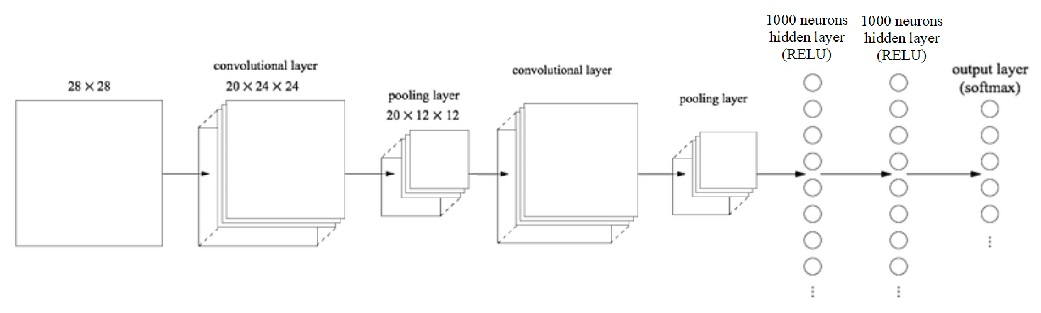


In [10]:
def cnn_model(filters, units, dropout_rate):
    model = models.Sequential()

    model.add(Input((28,28,1)))
    model.add(Conv2D(filters=filters, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=filters, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=units, activation="relu"))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=units, activation="relu"))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(10, activation="softmax"))

    return model

## Train model

In [11]:
def train_cnn_model(filters=20, units=1000, dropout_rate=0.5, epochs=1000):

    # Create model instance
    model = cnn_model(filters=filters,
                      units=units,
                      dropout_rate=dropout_rate)
    
    # Compile model with learning parameters
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Create callback for early stopping on validation loss.
    # If the loss does not decrease in patience consecutive tries, stop training.
    callbacks = [EarlyStopping(monitor='val_loss', patience=4)]

     # Train and validate model.
    history = model.fit(
            train_images,
            train_labels,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=(val_images, val_labels),
            verbose=2)
    
    # Print results.
    print(f"\nValidation accuracy: {history.history['val_acc'][-1]}, loss: {history.history['val_loss'][-1]}")

    return model, history

In [12]:
model, history = train_cnn_model()

Epoch 1/1000
1875/1875 - 47s - 25ms/step - acc: 0.9533 - loss: 0.1512 - val_acc: 0.9806 - val_loss: 0.0526
Epoch 2/1000
1875/1875 - 44s - 24ms/step - acc: 0.9824 - loss: 0.0620 - val_acc: 0.9848 - val_loss: 0.0473
Epoch 3/1000
1875/1875 - 44s - 24ms/step - acc: 0.9854 - loss: 0.0510 - val_acc: 0.9830 - val_loss: 0.0551
Epoch 4/1000
1875/1875 - 45s - 24ms/step - acc: 0.9878 - loss: 0.0428 - val_acc: 0.9858 - val_loss: 0.0504
Epoch 5/1000
1875/1875 - 44s - 24ms/step - acc: 0.9890 - loss: 0.0382 - val_acc: 0.9874 - val_loss: 0.0482
Epoch 6/1000
1875/1875 - 44s - 24ms/step - acc: 0.9901 - loss: 0.0363 - val_acc: 0.9850 - val_loss: 0.0582

Validation accuracy: 0.9850000143051147, loss: 0.058227282017469406


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 20)     │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 20)       │        10,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       321,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,027,652 (15.36 MB)

 Trainable params: 1,342,550 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,685,102 (10.24 MB)

## Tune hyperparameters

In [14]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.legend()
    plt.show()

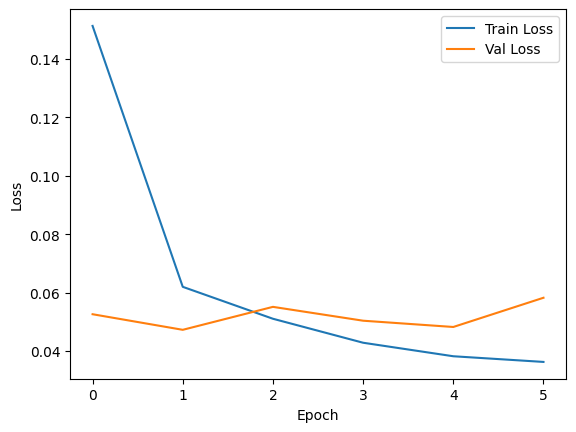

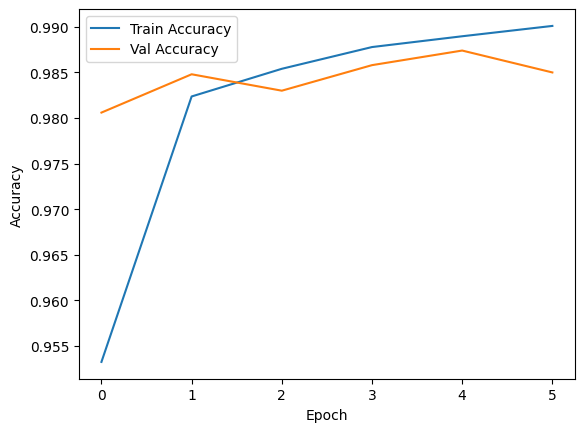

In [15]:
plot_history(history)

## Evaluate model

In [16]:
loss, acc = model.evaluate(test_images, test_labels)
print(f"Model loss: {loss:.2f}")
print(f"Model accuracy: {acc * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9950 - loss: 0.0210
Model loss: 0.02
Model accuracy: 99.52%


## Save model

In [17]:
model.save('model.keras')

## Make predictions

In [18]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
resized2=test_images[0].reshape(1, 28, 28)

In [20]:
model.predict(resized2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[4.1717642e-19, 6.4455477e-12, 2.1021318e-12, 1.0000000e+00,
        1.1749295e-17, 4.1845114e-09, 9.1217084e-19, 7.9705097e-15,
        4.3950204e-12, 2.5238177e-13]], dtype=float32)

In [21]:
predictions = model.predict(test_images)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [22]:
def plot_image(prediction, true_label, img):
    """
    Plots an ``image`` along with its predicted label and true label.

    Args:
    - prediction (numpy.ndarray): The predicted label probabilities.
    - true_label (int): The true label for the image.
    - img (numpy.ndarray): The image data.
    """

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    
    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(prediction):.0f}%) Correct: {true_label}")


def plot_bar_chart(prediction, true_label):
    """
    Plots a ``bar chart`` showing the predicted label probabilities.

    Args:
    - prediction (numpy.ndarray): The predicted label probabilities.
    - true_label (int): The true label for the image.
    """

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Plot the first X test images, their predicted labels, and the true labels.

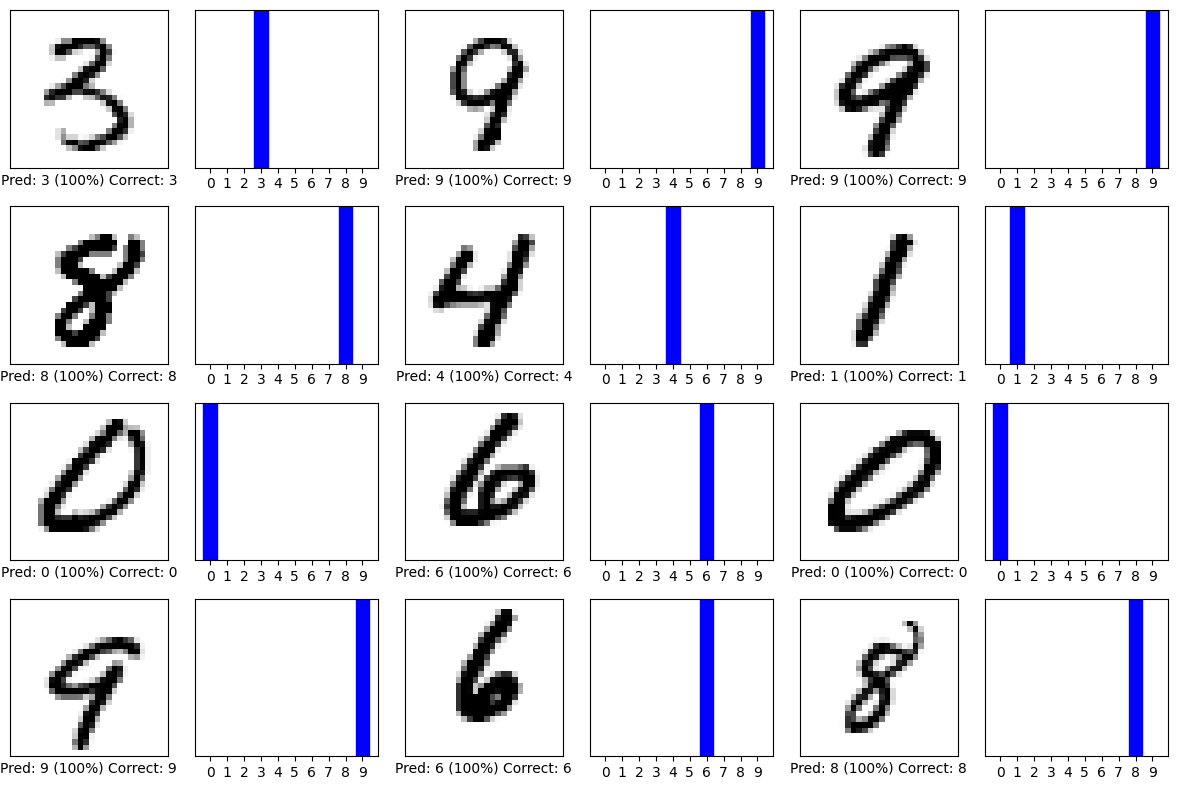

In [23]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):

    # Left subplot for the image
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])

    # Right subplot for the prediction plot
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_bar_chart(predictions[i], test_labels[i])

plt.tight_layout()
plt.show()

## Errors

The list errors contains the indexes of the test images that the neural network model could not classify correctly.

In [24]:
errors = []

for i in range(len(predictions)):
    
    if np.argmax(predictions[i]) != test_labels[i]:
        
        errors.append(i)

print(f"Failed {len(errors)} out of {len(predictions)} predictions")

Failed 24 out of 5000 predictions


Plot the miss predicted test images, their predicted labels, and the true labels.

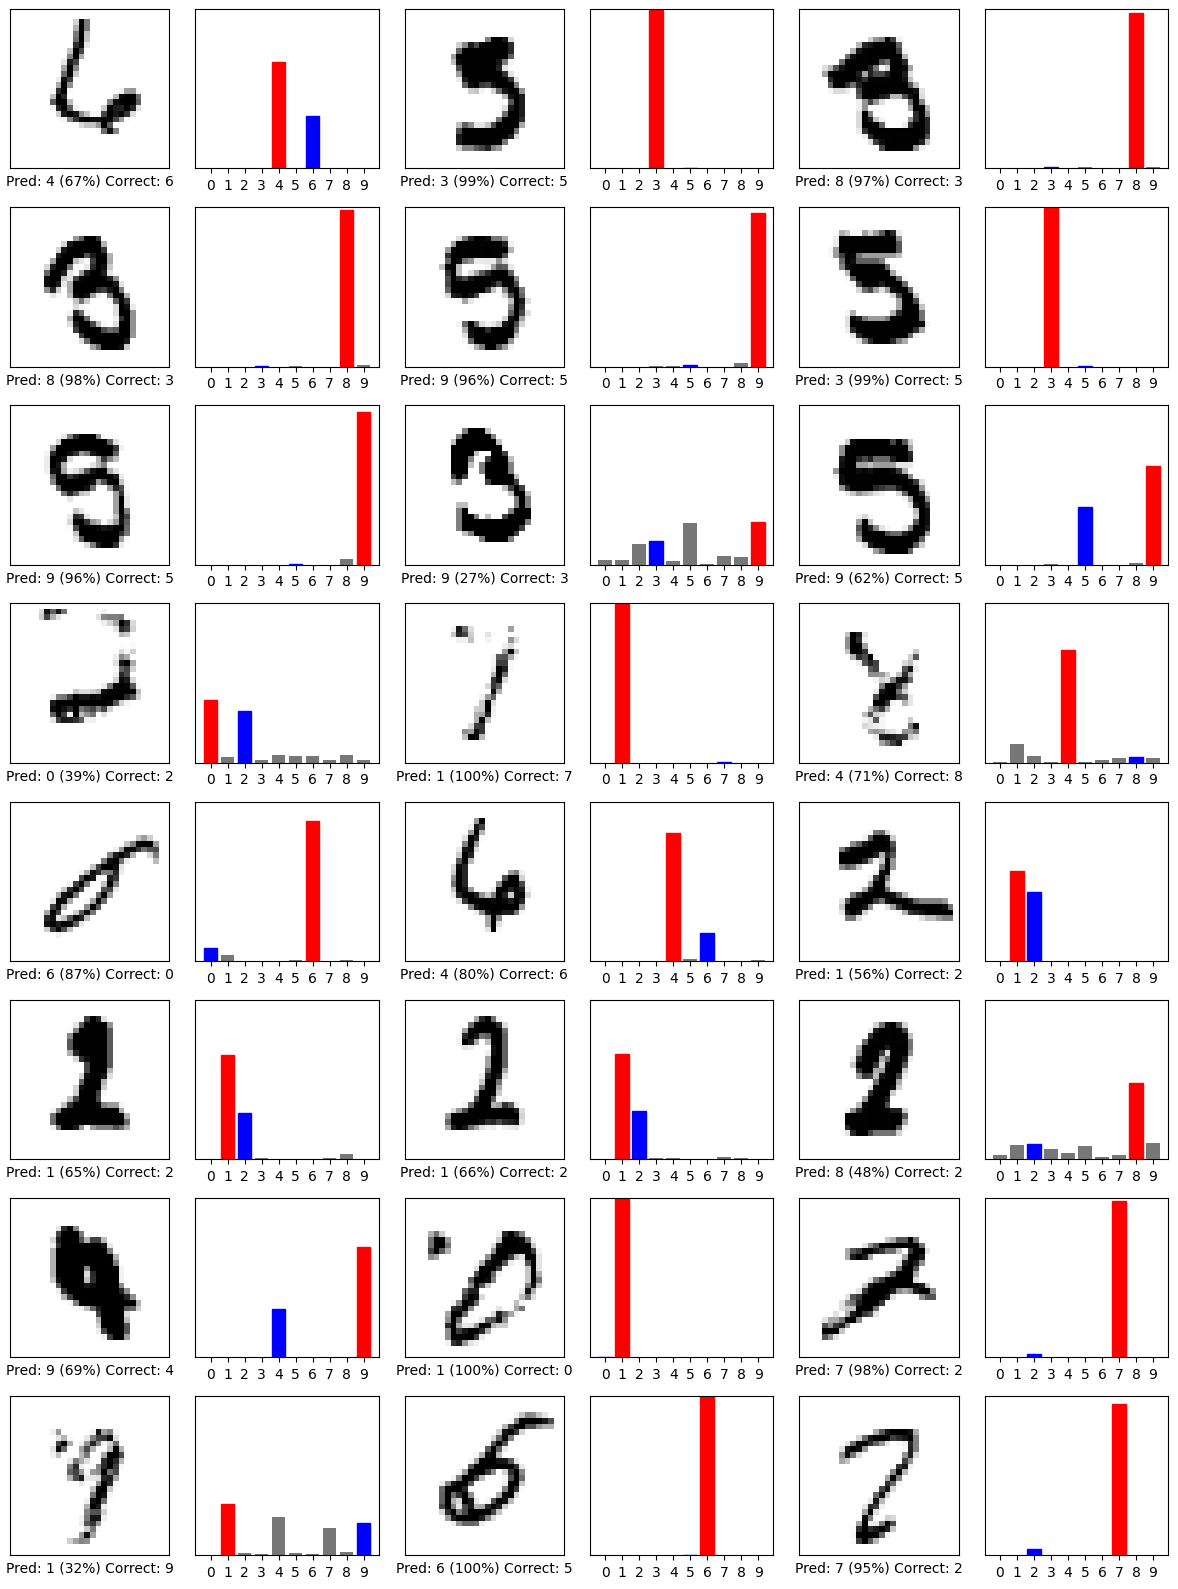

In [25]:
num_cols = 3
num_rows = len(errors) // num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Counter for the subplots
j=0

for i in errors:

    # Left subplot for the image
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(predictions[i], test_labels[i], test_images[i])

    # Right subplot for the prediction plot
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_bar_chart(predictions[i], test_labels[i])

    j+=1

plt.tight_layout()
plt.show()